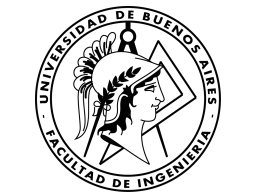

# Trabajo Práctico: Descomposición de señales mediante series de Fourier a través de resolución de problema de cuadrados mínimos

# Análisis Numérico
# 1er cuatrimestre de 2021

## Integrantes
Curso: 05 - Sassano

Grupo 17

- Mastricchio, Facundo Rodrigo - 100874
- Persia, Nahuel - 90772
- Zelechowski, Sergio - 86651


## 1) Forma general de la serie de Fourier de una señal cuadrada

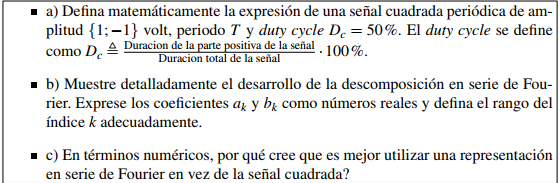

### a) Expresion de la señal cuadrada periodica

La señal cuadrada periodica de amplitud {1; -1} volts, de periodo $T$ y duty cycle $D_c = 50 \% $ que nos indica que en un periodo la mitad del tiempo la señal se encontrará en la parte positiva, mientras que la otra mitad será en la parte 'apagada' (o negativa en este caso),  tendrá la forma:

  $$ f(t)=   \left\{
\begin{array}{ll}
      -1 & \frac{-T}{2} < t < 0 \\
      1 & 0 < t < \frac{T}{2} \\
\end{array} 
\right. $$

con $f(t + T) = f(t)$ al ser una señal periodica.

A continuación, se deja un ejemplo de la señal con un periodo $T = 2$ y una amplitud de 1.

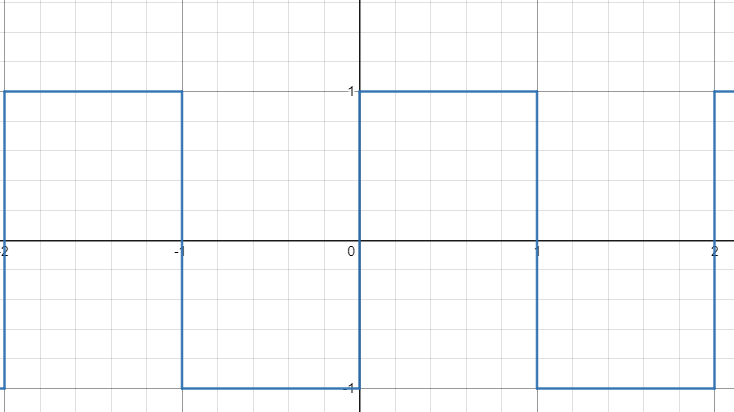

### b) Desarrollo de la descomposicion en serie de Fourier

El teorema de Fourier garantiza que una función periódica que satisface ciertas condiciones de continuidad puede ser expresada como suma de un número infinito de funciones senoidales de diferentes amplitudes, fases y períodos. Por lo tanto, sabemos que la descomposicion en serie de Fourier dada una funcion $f(t)$ consiste en:

$f(t) \approx a_0 + \sum_{k=1}^\infty a_k cos(k\omega t) + \sum_{k=1}^\infty b_k sen(k\omega t)$ donde $ \omega = \frac{2\pi}{T} = 2\pi f$.

El conjunto formado por las $ \{1, cos(wt), cos(2wt), cos(kwt), ..., sen(wt), sen(2wt), ..., sen(kwt)\} $ es una base ortogonal (formado por 2k + 1 vectores) del espacio de las funciones periodicas, si proyectamos la funcion sobre esta base obtenemos:

* $ a_0 = \frac{1}{T} \int_{d}^{d + T} f(t) \ dt $

* $ a_k = \frac{2}{T} \int_{d}^{d + T} f(t) \ cos(kwt) \ dt $ con k = 0, 1, 2, ...

* $ b_k = \frac{2}{T} \int_{d}^{d + T} f(t) \ sen(kwt) \ dt $ con k = 0, 1, 2, ...


**Obteniendo coeficientes** 

Para el caso de $a_0$ vemos que lo que se tiene es un factor aplicado al valor medio de la funcion. Pero en este caso al ser una señal cuadrada periodica con una amplitud de 1 y un $D_c = 50 \% $ y observando el gráfico anterior de ejemplo, se puede ver que el área comprendida en un periodo es nula pues se suman y resta la misma area; luego $a_0 = 0$

Para el caso de $a_k$ nos valemos de las propiedades de las funciones pares e impares. Sabemos que la funcion coseno es par y la funcion seno es impar, y si observamos el gráfico de la funcion cuadrada podemos ver que dicha funcion es impar, y como con $a_k$ estamos trabajando con el coseno (que es par) entonces $a_k = 0 \ \forall k = 1, 2, ...  $

Para el caso de $b_k$ debemos desarrollar la expresion:

$ b_k = \frac{2}{T} \int_{d}^{d + T} f(t) \ sen(kwt) \ dt = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \ sen(kwt) \ dt =  \frac{2}{T}[ \int_{-T/2}^{0}-sen(kwt) \ dt + \int_{0}^{T/2}sen(kwt) \ dt ] = \frac{2}{T} [ \frac{-1}{wk} (-1 + cos(\frac{Twk}{2})) + \frac{1}{wk} (1 - cos(\frac{Twk}{2})) ] = \frac{2}{T} \frac{1}{kw} (2 - 2cos(\frac{Twk}{2})) = \frac{4}{2\pi k} (1 - cos(\pi k)) = \frac{2}{\pi k} (1 - cos(k \pi)) $

Entonces tenemos $b_k = \frac{2}{k \pi} (1 - cos(k \pi)) \ \forall k = 1, 2, ... $. Sin embargo, si seguimos analizando vemos que para un valor de $k$ par es $cos(k\pi) = 1 $ y para un valor de k impar es $cos(k\pi) = -1 $ entonces:

$ b_k =   \left\{
\begin{array}{ll}
      \frac{4}{k\pi} & \text{si k es impar} \\
      0  & \text{si k es par} \\
\end{array} 
\right. $

**Por lo tanto, la funcion desarrollada como serie de Fourier queda:**

$ f(t) \approx \sum_{k=1}^{\infty} b_k \ sen(k\omega t) = \sum_{k=1, \text{k impar}}^{\infty} \frac{4}{k\pi} \ sen(k\omega t) = \sum_{k=1, \text{k impar}}^{\infty} \frac{4}{k\pi} \ sen(k \frac{2\pi}{T} t) $

Ahora bien, el rango del índice $k$ que debemos utilizar es aquel que nos permita representar la señal cuadrada lo mas fielmente posible a través de esta aproximacion mediante senos pero tampoco debe ser un rango muy grande ya que puede ser que a partir de cierto valor de $k$ no se obtenga una mejora significativa. Por ejemplo: un rango de $ 1 \leq k \leq 100 $ parece razonable.






### c) En términos numéricos, por qué cree que es mejor utilizar una representación en serie de Fourier en vez de la señal cuadrada?

Creemos que es mejor utilizar una serie de Fourier en vez de la señal cuadrada debido a que nos facilita a la hora de trabajar al estar usando una aproximación. Por otro lado, nosotros podemos definir el valor máximo de iteraciones $N$ (o el valor de rango de $k$) y de acuerdo esto podemos ser mas laxos o mas estrictos dependiendo la aplicación que le queremos dar.

## 2) Determinación de coeficientes de Fourier por ajuste de funciones

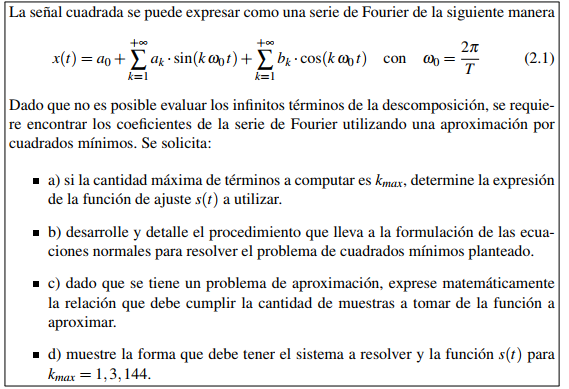

### a) si la cantidad máxima de términos a computar es $ k_{max} $, determine la expresión de la función de ajuste $s(t)$ a utilizar

Si la cantidad de términos a computar es $k_{max}$ entonces la funcion $s(t)$ a utilizar sería similar a la funcion $x(t)$ pero sin la sumatoria hasta infinito, es decir:

$ s(t) = a_0 + \sum_{k=1}^{k_{max}} a_k \ cos(kwt) + \sum_{k=1}^{k_{max}} b_k \ sen(kwt) $ con  $ \omega = \frac{2\pi}{T} = 2\pi f$.

**Observacion:** cambiamos el lugar de los $a_k$ y $b_k$ por comodidad

### b) Desarrolle y detalle el procedimiento que lleva a la formulación de las ecuaciones normales para resolver el problema de cuadrados mínimos planteado

Supongamos que tenemos una tabla de datos para

$ s(t) = a_0 + \sum_{k=1}^{k_{max}} a_k cos(kwt) + \sum_{k=1}^{k_{max}} b_k sen(kwt)$

$ y_1 = s(t_1) = a_0 + \sum_{k=1}^{k_{max}} a_k cos(kwt_1) + \sum_{k=1}^{k_{max}} b_k sen(kwt_1) $

$ y_2 = s(t_2) = a_0 + \sum_{k=1}^{k_{max}} a_k cos(kwt_2) + \sum_{k=1}^{k_{max}} b_k sen(kwt_2) $

$ \vdots $

$ y_n = s(t_n) = a_0 + \sum_{k=1}^{k_{max}} a_k cos(kwt_n) + \sum_{k=1}^{k_{max}} b_k sen(kwt_n) $

Matricialmente el sistema $ Ax = b $ seria:

$ 
\begin{pmatrix}        
  1 & cos(1wt_1) & cos(2wt_1) & \cdots & cos(k_{max}wt_1) & sen(1wt_1) & sen(2wt_1) & \cdots & sen(k_{max}wt_1) \\
  1 & cos(1wt_2) & cos(2wt_2) & \cdots & cos(k_{max}wt_2) & sen(1wt_2) & sen(2wt_2) & \cdots & sen(k_{max}wt_2) \\
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \\
  1 & cos(1wt_n) & cos(2wt_n) & \cdots & cos(k_{max}wt_n) & sen(1wt_n) & sen(2wt_n) & \cdots & sen(k_{max}wt_n)
\end{pmatrix}
\begin{pmatrix}        
  a_0 \\
  a_1 \\
  \vdots \\
  a_{k_{max}} \\
  b_1 \\
  b_2 \\
  \vdots \\
  b_{k_{max}}
\end{pmatrix}
= 
\begin{pmatrix}        
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
\end{pmatrix} 
$

Que en principio no seria compatible pues puede ser que los $ n $ datos no sean suficentes para hallar los $ 2k_{max} + 1 $ coeficientes.

Entonces para hallar los coeficientes partimos de minimizar la formula del error cuadratico medio (planteamos funciones genericas con coeficientes genericos para que no sea tan engorroso)

$ E_{cm} = \sqrt{\frac{1}{n} \sum_{k=1}^{n}(y_k - f(x_k))^2 } = \sqrt{\frac{1}{n} \sum_{k=1}^{n}(y_k - \sum_{j=0}^{2k_{max}} c_j f_j(x_k))^2} $

Derivando e igualando a cero:

$ \frac{\mathrm{d} E_c}{\mathrm{d} c_i} = \sum_{k=1}^{n} 2(y_k - \sum_{j=0}^{2k_{max}} c_j f_j(x_k))(-f_i(x_k)) = 0 \ \forall i = 0, 1, ..., 2k_{max}$

Trabajando un poco la expresion se llega a que:

$ \sum_{j=0}^{2k_{max}} (\sum_{k=1}^{n} f_i(x_k) f_j(x_k))c_j = \sum_{k=1}^{n} y_k f_i(x_k) \ \forall i = 0, 1, ..., 2k_{max} $

Estas sumatorias son aplicables para cada uno de los coeficientes. Es mucho mas intuitivo si lo vemos de forma matricial:

$
\begin{pmatrix}
    (f_1, f_1) & (f_1, f_2) & \cdots & (f_1, f_{2k_{max}}) \\
    (f_2, f_1) & (f_2, f_2) & \cdots & (f_2, f_{2k_{max}}) \\
    \vdots & \vdots & \vdots & \vdots & \\
    (f_{2k_{max}}, f_1) & (f_{2k_{max}}, f_2) & \cdots & (f_{2k_{max}}, f_{2k_{max}}) \\  
\end{pmatrix}
\begin{pmatrix}
    c_1 \\
    c_2 \\
    \vdots \\
    c_{2k_{max}}
\end{pmatrix}
= 
\begin{pmatrix}
    (f_1, y) \\
    (f_2, y) \\
    \vdots \\
    (f_{2k_{max}}, y)
\end{pmatrix}
$

donde definimos el producto interno discretizado como

$ (f_a, f_b) = \sum_{k=1}^{n} f_a(x_k) f_b(x_k) $

Esto se ve mejor al notar que $ A^TAx = A^Tb $ genera el mismo sistema donde $ A $ tiene dimension $ n \ x \ ({2k_{max}+1}) $ y $A^T$ tiene dimension $ ({2k_{max}+1}) \ x \ n $

$
\begin{pmatrix}
    f_1(x_1) & f_1(x_2) & \cdots & f_1(x_n) \\
    f_2(x_1) & f_2(x_2) & \cdots & f_2(x_n) \\
    \vdots & \vdots & \vdots & \vdots & \\
    f_{2k_{max}}(x_1) & f_{2k_{max}}(x_2) & \cdots & f_{2k_{max}}(x_n) \\  
\end{pmatrix}
\begin{pmatrix}
    f_1(x_1) & f_2(x_1) & \cdots & f_{2k_{max}}(x_1) \\
    f_1(x_2) & f_2(x_2) & \cdots & f_{2k_{max}}(x_2) \\
    \vdots & \vdots & \vdots & \vdots & \\
    f_1(x_n) & f_2(x_n) & \cdots & f_{2k_{max}}(x_n) \\  
\end{pmatrix}
\begin{pmatrix}        
  c_1 \\
  c_2 \\
  \vdots \\
  c_{2k_{max}}
\end{pmatrix}
=
\begin{pmatrix}
    f_1(x_1) & f_1(x_2) & \cdots & f_1(x_n) \\
    f_2(x_1) & f_2(x_2) & \cdots & f_2(x_n) \\
    \vdots & \vdots & \vdots & \vdots & \\
    f_{2k_{max}}(x_1) & f_{2k_{max}}(x_2) & \cdots & f_{2k_{max}}(x_n) \\  
\end{pmatrix}
\begin{pmatrix}        
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
\end{pmatrix}
$











### c) Dado que se tiene un problema de aproximación, exprese matemáticamente la relación que debe cumplir la cantidad de muestras a tomar de la función a aproximar

Sea $ n $ la cantidad de muestras y $ 2k_{max} + 1 $ la cantidad de incognitas, la relacion que se debe cumplir es que $ n >= 2k_{max} + 1 $. Si lo pensamos en dos dimensiones, seria imposible hacer un ajuste lineal con un solo punto de muestra ya que existirian infinitas rectas que pasen por ese punto.

### d) muestre la forma que debe tener el sistema a resolver y la función s(t) para $ k_{max} $ = 1; 3; 144

**Aclaracion:** en esta item en todos los casos tomamos como cantidad de muestras $ n = 1 $ por una cuestion de comodidad ya que quedaban matrices bastante grandes para expresar.

#### Para $ k_{max} = 1 $

$ s(t) = a_0 + a_1 \ cos(wt) +  b_1 \ sen(wt) $

Tenemos las siguientes matrices

$ A = \begin{pmatrix}        
  1 & cos(wt) & sen(wt) \\
 \end{pmatrix}$
, $ A^T = \begin{pmatrix}        
  1 \\
  cos(wt) \\
  sen(wt)
 \end{pmatrix}$
, $ b = \begin{pmatrix}        
  y_1 \\
 \end{pmatrix}$
, $ x = \begin{pmatrix}        
  a_{0} \\
  a_{1} \\
  b_{1}
\end{pmatrix}
$

El sistema $ A^TAx = A^Tb $ quedaria:

$
\begin{pmatrix}        
  1 & cos(wt) & sen(wt) \\
  cos(wt) & cos(wt)cos(wt) & cos(wt)sen(wt) \\
  sen(wt) & sen(wt)cos(wt) & sen(wt)sen(wt)
\end{pmatrix}
\begin{pmatrix}        
  a_{0} \\
  a_{1} \\
  b_{1}
\end{pmatrix}
=
\begin{pmatrix}        
  1y_1 \\
  cos(wt)y_1 \\
  sen(wt)y_1
\end{pmatrix}
$




#### Para $ k_{max} = 3 $



$ s(t) = a_0 + \sum_{k=1}^{3} a_k \ cos(kwt) + \sum_{k=1}^{3} b_k \ sen(kwt) $

Tenemos las siguientes matrices:

$ A = \begin{pmatrix}        
  1 & cos(1wt) & cos(2wt) & cos(3wt) & sen(1wt) & sen(2wt) & sen(3wt) \\
 \end{pmatrix}$
, $ A^T = \begin{pmatrix}        
  1 \\
  cos(1wt) \\
  cos(2wt) \\
  cos(3wt) \\
  sen(1wt) \\
  sen(2wt) \\
  sen(3wt)
 \end{pmatrix}$
, $ b = \begin{pmatrix}        
  y_1 \\
 \end{pmatrix}$
, $ x = \begin{pmatrix}        
  a_{0} \\
  a_{1} \\
  a_{2} \\
  a_{3} \\
  b_{1} \\
  b_{2} \\
  b_{3}
\end{pmatrix}
$

El sistema $ A^TAx = A^Tb $ quedaria:

$
\begin{pmatrix}        
  1 & cos(1wt) & cos(2wt) & cos(3wt) & sen(1wt) & sen(2wt) & sen(3wt) \\
  cos(1wt) & cos(1wt)cos(1wt) & cos(1wt)cos(2wt) & cos(1wt)cos(3wt) & cos(1wt)sen(1wt) &cos(1wt)sen(2wt) & cos(1wt)sen(3wt) \\
  cos(2wt) & cos(2wt)cos(1wt) & cos(2wt)cos(2wt) & cos(2wt)cos(3wt) & cos(2wt)sen(1wt) &cos(2wt)sen(2wt) & cos(2wt)sen(3wt) \\
  cos(3wt) & cos(3wt)cos(1wt) & cos(3wt)cos(2wt) & cos(3wt)cos(3wt) & cos(3wt)sen(1wt) &cos(3wt)sen(2wt) & cos(3wt)sen(3wt) \\
  sen(1wt) & sen(1wt)cos(1wt) & sen(1wt)cos(2wt) & sen(1wt)cos(3wt) & sen(1wt)sen(1wt) & sen(1wt)sen(2wt) & sen(1wt)sen(3wt) \\
  sen(2wt) & sen(2wt)cos(1wt) & sen(2wt)cos(2wt) & sen(2wt)cos(3wt) & sen(2wt)sen(2wt) & sen(2wt)sen(2wt) & sen(2wt)sen(3wt) \\
  sen(3wt) & sen(3wt)cos(1wt) & sen(3wt)cos(2wt) & sen(3wt)cos(3wt) & sen(3wt)sen(3wt) & sen(3wt)sen(2wt) & sen(3wt)sen(3wt) \\
\end{pmatrix}
\begin{pmatrix}   
  a_{0} \\
  a_{1} \\
  a_{2} \\
  a_{3} \\
  b_{1} \\
  b_{2} \\
  b_{3}
\end{pmatrix}
=
\begin{pmatrix}   
  1y_1 \\
  cos(1wt)y_1 \\
  cos(2wt)y_1 \\
  cos(3wt)y_1\\
  sen(1wt)y_1 \\
  sen(2wt)y_1 \\
  sen(3wt)y_1
\end{pmatrix}
$


#### Para $ k_{max} = 144 $

$ s(t) = a_0 + \sum_{k=1}^{144} a_k \ cos(kwt) + \sum_{k=1}^{144} b_k \ sen(kwt) $

Tenemos las siguientes matrices:

$ A = \begin{pmatrix}        
  1 & cos(1wt) & cos(2wt) & \cdots \ cos(144wt) & sen(1wt) & sen(2wt) & \cdots & sen(144wt) \\
 \end{pmatrix}$
, $ A^T = \begin{pmatrix}        
  1 \\
  cos(1wt) \\
  cos(2wt) \\
  \vdots \\
  cos(144wt) \\
  sen(1wt) \\
  sen(2wt) \\
  \vdots \\
  sen(144wt)
 \end{pmatrix}$
, $ b = \begin{pmatrix}        
  y_1 \\
 \end{pmatrix}$
, $ x = \begin{pmatrix}        
  a_{0} \\
  a_{1} \\
  a_{2} \\
  \vdots \\
  a_{144} \\
  b_{1} \\
  b_{2} \\
  \vdots \\
  b_{144}
\end{pmatrix}
$

El sistema $ A^TAx = A^Tb $ quedaria:

$
\begin{pmatrix}
  1 & cos(1wt) & cos(2wt) & \cdots & cos(144wt) & sen(1wt) & sen(2wt) & \cdots & sen(144wt) \\
  cos(1wt) & cos(1wt)cos(1wt) & cos(1wt)cos(2wt) & \cdots & cos(1wt)cos(144wt) & cos(1wt)sen(1wt) &cos(1wt)sen(2wt) & \cdots & cos(1wt)sen(144wt) \\
  cos(2wt) & cos(2wt)cos(1wt) & cos(2wt)cos(2wt) & \cdots & cos(2wt)cos(144wt) & cos(2wt)sen(1wt) &cos(2wt)sen(2wt) & \cdots & cos(2wt)sen(144wt) \\
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
  cos(144wt) & cos(144wt)cos(1wt) & cos(144wt)cos(2wt) & \cdots & cos(144wt)cos(144wt) & cos(144wt)sen(1wt) &cos(144wt)sen(2wt) &  \cdots & cos(144wt)sen(144wt) \\
  sen(1wt) & sen(1wt)cos(1wt) & sen(1wt)cos(2wt) & \cdots & sen(1wt)cos(144wt) & sen(1wt)sen(1wt) & sen(1wt)sen(2wt) & \cdots & sen(1wt)sen(144wt) \\
  sen(2wt) & sen(2wt)cos(1wt) & sen(2wt)cos(2wt) & \cdots & sen(2wt)cos(144wt) & sen(2wt)sen(1wt) & sen(2wt)sen(2wt) & \cdots & sen(2wt)sen(144wt) \\
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots   \\
  sen(144wt) & sen(144wt)cos(1wt) & sen(144wt)cos(2wt) & \cdots & sen(144wt)cos(144wt) & sen(144wt)sen(1wt) & sen(144wt)sen(2wt) &  \cdots & sen(144wt)sen(144wt) \\
\end{pmatrix}
\begin{pmatrix}
  a_{0} \\
  a_{1} \\
  a_{2} \\
  \vdots \\
  a_{144} \\
  b_{1} \\
  b_{2} \\
  \vdots \\
  b_{144}
\end{pmatrix}
=
\begin{pmatrix}
  1y_1 \\
  cos(1wt)y_1 \\
  cos(2wt)y_1 \\
  \vdots \\
  cos(144wt)y_1 \\
  sen(1wt)y_1 \\
  sen(2wt)y_1 \\
  \vdots \\
  sen(144wt)y_1
\end{pmatrix}
$



## 3) Resolución mediante eliminación gaussiana con pivoteo parcial

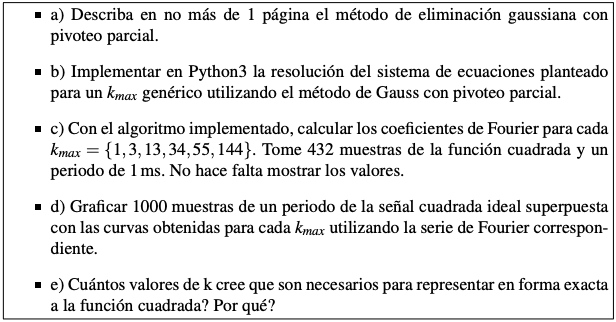

### a) Describa en no más de 1 página el método de eliminación gaussiana con pivoteo parcial

La idea del metodo de Gauss o eliminacion gaussiana es la de dado un sistema $ Ax = b $ se triangula superiormente la matriz A. El hecho de que sea con pivoteo parcial es que antes de cada paso (o triangulacion) se deben obtener los multiplicadores de tal manera que sean los máximos en valor absoluto. Es decir, se deben intercambiar las filas sobre la matriz que se esta trabajando de manera que, por ejemplo, $ m_{21} = \frac{a_{21}}{a_{11}} $ sea maximo en valor absoluto pero esto se logra haciendo que $ a_{11} $ sea el máximo valor absoluto disponible. Una vez que la matriz se encuentra triangulada, se procede a hacer una 'sustitucion inversa', es decir, a resolver desde la ultima fila (que va a tener una sola incognita y se puede despejar) hacia la fila anterior (que va a tener dos incognitas pero una de ellas ya se despejo en la ultima fila) y asi sucesivamente hasta la primera fila.

### b) Implementar en Python3 la resolución del sistema de ecuaciones planteado para un $ k_{max} $ genérico utilizando el método de Gauss con pivoteo parcial

In [50]:
import numpy as np
from math import isclose

def eliminacion_gaussiana_pivot_parcial(A, b):
  '''
  Realiza la eliminacion gaussiana con pivoteo parcial del sistema Ax = b.
  A: debe ser una matriz cuadrada.
  b: debe contener la misma cantidad de filas que A.
  Devuelve la matriz A triangulada junto con el vector b swappeado como corresponde.
  '''
  # Convertimos a np.array para poder trabajar mas facil
  A = np.array((A), dtype=float)
  b = np.array((b), dtype=float)
  dimension_b = len(b)
  # Recorremos las columnas de la matriz
  for i in range(0, dimension_b - 1):
    # Recorremos por fila y chequeamos condicion de swap
    if isclose(np.abs(A[i, i]), 0, abs_tol=1E-15):
      for k in range(i + 1, dimension_b):
        if np.abs(A[k, i]) > np.abs(A[i, i]):
          # Swappeamos las filas, hacer a[[0, 2]] es lo mismo que a[[0, 2], :]
          A[[i, k]] = A[[k, i]]
          b[[i, k]] = b[[k, i]]
          break
    # Recorremos las filas debajo de la diagonal para cada columna            
    for j in range(i + 1, dimension_b):
      # Obtenemos multiplicador
      if isclose(np.abs(A[i, i]), 0, abs_tol=1E-15):
        raise ZeroDivisionError('Error en triangulacion, se presenta un division por cero o casi cero')
      m = A[j, i] / A[i, i]
      # Actualizamos las filas de la matriz aplicando el multiplicador
      A[j, :] = A[j, :] - m * A[i, :]
      # Hacemos lo mismo con el vector 'b'
      b[j] = b[j] - m * b[i]

  return A, b

def sustitucion_inversa(A_final, b_final):
  '''
  Realiza la sustitucion inversa para resolver A_final*x = b_final.
  A_final y b_final son los vectores que salen luego de aplicar la eliminacion_gaussiana_pivot_parcial.
  Devuelve el vector 'x' solucion.
  '''
  dim_b = b_final.size
  # Iniciamos el vector solucion con todos 0
  x = np.zeros(dim_b)    
  # Resolvemos la ultima entrada a mano     
  if isclose(np.abs(A_final[dim_b - 1, dim_b - 1]), 0, abs_tol=1E-15):
    raise ZeroDivisionError('Error en sustitucion inversa, se presenta un division por cero o casi cero')   
  x[dim_b - 1] = b_final[dim_b - 1] / A_final[dim_b - 1, dim_b - 1]  
  # Recorremos desde el final hasta el principio de la matriz  
  for i in range(dim_b - 2, -1, -1):      
    suma_aux = 0
    # Para valores conocidos de 'x', sumamos
    for j in range(i + 1, dim_b):        
      suma_aux = suma_aux + A_final[i, j] * x[j]
    if isclose(np.abs(A_final[i,i]), 0, abs_tol=1E-15):
      raise ZeroDivisionError('Error en sustitucion inversa, se presenta un division por cero o casi cero')  
    x[i] = (b_final[i] - suma_aux) / A_final[i,i]
  return x

In [51]:
# Prueba 1
A_final, b_final = eliminacion_gaussiana_pivot_parcial(np.array([[3.0, 1.0, -1.0],[ 6.0, 4.0, -2.0],[ -3.0, -1.0, 0.0]]), [0.0,-2.0,-2.0])
sustitucion_inversa(A_final, b_final)

array([ 1., -1.,  2.])

In [52]:
# Verificando solucion
np.linalg.solve(np.array([[3.0, 1.0, -1.0],[ 6.0, 4.0, -2.0],[ -3.0, -1.0, 0.0]]), [0.0,-2.0,-2.0])

array([ 1., -1.,  2.])

In [53]:
# Prueba 2
A = np.array([[0, 3, 5],[3, 0, 1],[6, 7, 2]])
b = np.array([23, 14, 26])
A_final, b_final = eliminacion_gaussiana_pivot_parcial(A, b)
sustitucion_inversa(A_final, b_final)

array([ 3.07619048, -0.28571429,  4.77142857])

In [54]:
# Verificando solucion
np.linalg.solve(A, b)

array([ 3.07619048, -0.28571429,  4.77142857])

### c) Con el algoritmo implementado, calcular los coeficientes de Fourier para cada $ k_{max} = 1; 3; 13 ; 34; 55; 144 $. Tome 432 muestras de la función  cuadrada y un periodo de 1ms. No hace falta mostrar los valores

**Aclaracion:** tomamos $ a_0 = 0$ para programar la matriz de ajuste de cuadrados minimos.

In [55]:
import numpy as np
from math import pi

periodo = 1
cant_muestras = 432

def generar_muestras(cant_muestras=432, periodo=1):
  '''
  Crea los t_i y los y_i correspondientes de la señal cuadrada a muestrear.
  Devuelve arrays t_i, y_i
  '''
  # Creamos los t_i equiespaciados sobre el periodo
  t_i = np.linspace(0, periodo, num=cant_muestras)
  # Creamos un array de todos 1 por default de tamaño cant_muestras
  y_i = np.ones(cant_muestras)
  # Reemplazamos la segunda mitad de los elementos del array anterior por -1
  # asi tenemos mitad de valores de 1 y mitad de -1 sabiendo que el ciclo de trabajo es 50%
  for i in range(int(cant_muestras / 2), cant_muestras):
    y_i[i] = -1
  return t_i, y_i

# La matriz A deberia ser de dimension n_muestras x 2k_max.
# La primera columna que tiene 1s referida al a_0 no la consideramos.
def generar_matriz_de_ajuste(k_max, t_i, cant_muestras=432, periodo=1):
  '''
  Devuelve la matriz A que representa nuestra funcion de ajuste sobre las muestras.
  k_max: k_max referido a la serie discreta de Fourier.
  t_i: array con los tiempos equiespaciados sobre el periodo.
  cant_muestras: cantidad de muestras a tomar. Debe ser igual al len(t_i)
  periodo: periodo de la señal cuadrada.
  '''
  # shape = (filas, columnas). Creamos matriz llena de 0.
  A = np.zeros(shape=(cant_muestras, 2 * k_max))
  omega = 2 * pi / periodo
  # Recorremos la primera mitad de la matriz aplicando el coseno
  for row in range(0, len(A)):
    for col in range(0, k_max):
      A[row, col] = np.cos((col + 1) * omega * t_i[row])
  # Recorremos la segunda mitad de la matriz aplicando el seno
  for row in range(0, len(A)):
    col_aux = k_max
    for col in range(0, k_max):
      A[row, col_aux] = np.sin((col + 1) * omega * t_i[row])
      col_aux += 1
  return A

# La matriz a devolver seria de dimension 2k_max * 2k_max
def generar_matriz_de_cuadrados_minimos(A):
  '''
  Devuelve el producto de  A^T * A de cuadrados minimos.
  '''
  A_traspuesta = np.transpose(A)
  return np.dot(A_traspuesta, A)

def generar_producto_At_con_b(A, b):
  '''
  Devuelve el producto entre A^T * b de cuadrados minimos.
  La cantidad de columnas de A (filas de A^T) deben ser iguales a la cantidad de
  columnas de b.
  '''
  A_traspuesta = np.transpose(A)
  return np.dot(A_traspuesta, b)


t_i, y_i = generar_muestras()
prueba = generar_matriz_de_ajuste(3, t_i, 432, 1)

In [56]:
t_i

array([0.        , 0.00232019, 0.00464037, 0.00696056, 0.00928074,
       0.01160093, 0.01392111, 0.0162413 , 0.01856148, 0.02088167,
       0.02320186, 0.02552204, 0.02784223, 0.03016241, 0.0324826 ,
       0.03480278, 0.03712297, 0.03944316, 0.04176334, 0.04408353,
       0.04640371, 0.0487239 , 0.05104408, 0.05336427, 0.05568445,
       0.05800464, 0.06032483, 0.06264501, 0.0649652 , 0.06728538,
       0.06960557, 0.07192575, 0.07424594, 0.07656613, 0.07888631,
       0.0812065 , 0.08352668, 0.08584687, 0.08816705, 0.09048724,
       0.09280742, 0.09512761, 0.0974478 , 0.09976798, 0.10208817,
       0.10440835, 0.10672854, 0.10904872, 0.11136891, 0.1136891 ,
       0.11600928, 0.11832947, 0.12064965, 0.12296984, 0.12529002,
       0.12761021, 0.12993039, 0.13225058, 0.13457077, 0.13689095,
       0.13921114, 0.14153132, 0.14385151, 0.14617169, 0.14849188,
       0.15081206, 0.15313225, 0.15545244, 0.15777262, 0.16009281,
       0.16241299, 0.16473318, 0.16705336, 0.16937355, 0.17169

In [57]:
y_i

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [58]:
prueba

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.99893741e-01,  9.99574985e-01,  9.99043801e-01,
         1.45776398e-02,  2.91521816e-02,  4.37205280e-02],
       [ 9.99574985e-01,  9.98300301e-01,  9.96177031e-01,
         2.91521816e-02,  5.82795829e-02,  8.73574449e-02],
       ...,
       [ 9.99574985e-01,  9.98300301e-01,  9.96177031e-01,
        -2.91521816e-02, -5.82795829e-02, -8.73574449e-02],
       [ 9.99893741e-01,  9.99574985e-01,  9.99043801e-01,
        -1.45776398e-02, -2.91521816e-02, -4.37205280e-02],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -2.44929360e-16, -4.89858720e-16, -7.34788079e-16]])

#### $ k_{max} = 1 $

In [59]:
# Generamos esto una unica vez ya que los t_i y los y_i serian los mismos para todos los k_max
t_i, y_i = generar_muestras()

In [60]:
# Set up, generamos la matriz A de la funcion de ajuste, hallamos A^T * A y A^T * b
# Los resultados se los pasamos a la funcion que resuelve el sistema final.
A = generar_matriz_de_ajuste(1, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)
At_por_A_final, At_por_b_final = eliminacion_gaussiana_pivot_parcial(At_por_A, At_por_b)
sustitucion_inversa(At_por_A_final, At_por_b_final)

array([4.64036183e-16, 1.27323391e+00])

#### $ k_{max} = 3 $

In [61]:
# Set up, generamos la matriz A de la funcion de ajuste, hallamos A^T * A y A^T * b
# Los resultados se los pasamos a la funcion que resuelve el sistema final.
A = generar_matriz_de_ajuste(3, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)
At_por_A_final, At_por_b_final = eliminacion_gaussiana_pivot_parcial(At_por_A, At_por_b)
sustitucion_inversa(At_por_A_final, At_por_b_final)

array([ 1.64149862e-16, -1.71710057e-16,  5.94889303e-16,  1.27323391e+00,
       -3.38246273e-05,  4.24396269e-01])

#### $ k_{max} = 13 $

In [62]:
# Set up, generamos la matriz A de la funcion de ajuste, hallamos A^T * A y A^T * b
# Los resultados se los pasamos a la funcion que resuelve el sistema final.
A = generar_matriz_de_ajuste(13, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)
At_por_A_final, At_por_b_final = eliminacion_gaussiana_pivot_parcial(At_por_A, At_por_b)
sustitucion_inversa(At_por_A_final, At_por_b_final)

array([ 1.86459732e-16, -2.17711043e-16,  5.89309201e-16,  4.11809592e-17,
        3.51894282e-16,  9.41567778e-17,  2.76075639e-16, -7.84114405e-17,
        5.13323519e-16, -1.42754826e-16,  7.66990095e-16,  4.99068237e-17,
       -4.41054359e-18,  1.27323391e+00, -3.38246273e-05,  4.24396269e-01,
       -6.76528491e-05,  2.54619722e-01, -1.01488262e-04,  1.81851900e-01,
       -1.35334464e-04,  1.41420321e-01, -1.69195060e-04,  1.15687032e-01,
       -2.03073659e-04,  9.78682071e-02])

#### $ k_{max} = 34 $

In [63]:
# Set up, generamos la matriz A de la funcion de ajuste, hallamos A^T * A y A^T * b
# Los resultados se los pasamos a la funcion que resuelve el sistema final.
A = generar_matriz_de_ajuste(34, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)
At_por_A_final, At_por_b_final = eliminacion_gaussiana_pivot_parcial(At_por_A, At_por_b)
sustitucion_inversa(At_por_A_final, At_por_b_final)

array([ 2.59297406e-16, -2.02517155e-16,  5.91344101e-16,  7.79697643e-18,
        3.57719519e-16,  6.96604079e-17,  2.92962570e-16, -8.23847676e-17,
        5.17512474e-16, -1.60294094e-16,  7.91171844e-16,  4.07946585e-17,
       -1.05656242e-16, -9.95831033e-17,  6.43894336e-16, -3.59602203e-17,
        1.08017488e-16, -7.22243100e-17,  5.91646368e-16, -6.89346654e-18,
        1.64992310e-16, -1.00897714e-16,  5.41065800e-16, -9.08408328e-17,
        2.46762676e-16, -4.93174054e-17,  4.93444856e-16, -8.77816311e-17,
        2.07215791e-16,  9.43499208e-18,  5.60812050e-16, -5.83429758e-17,
        2.06885647e-16, -1.22111288e-18,  1.27323391e+00, -3.38246273e-05,
        4.24396269e-01, -6.76528491e-05,  2.54619722e-01, -1.01488262e-04,
        1.81851900e-01, -1.35334464e-04,  1.41420321e-01, -1.69195060e-04,
        1.15687032e-01, -2.03073659e-04,  9.78682071e-02, -2.36973879e-04,
        8.47980594e-02, -2.70899347e-04,  7.48005845e-02, -3.04853701e-04,
        6.69054639e-02, -

#### $ k_{max} = 55 $

In [64]:
# Set up, generamos la matriz A de la funcion de ajuste, hallamos A^T * A y A^T * b
# Los resultados se los pasamos a la funcion que resuelve el sistema final.
A = generar_matriz_de_ajuste(55, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)
At_por_A_final, At_por_b_final = eliminacion_gaussiana_pivot_parcial(At_por_A, At_por_b)
sustitucion_inversa(At_por_A_final, At_por_b_final)

array([ 2.95294008e-16, -2.45086233e-16,  6.44631159e-16, -4.59900330e-17,
        3.87506854e-16,  5.18817099e-17,  2.92884056e-16, -1.26361434e-16,
        4.76938407e-16, -2.48540841e-16,  7.88389261e-16,  1.00298903e-16,
       -9.46677874e-17, -1.03568892e-16,  6.35582459e-16, -8.11526596e-17,
        8.32634893e-17, -4.50882534e-17,  5.67609844e-16, -2.03962395e-17,
        1.26091027e-16, -1.25856563e-16,  4.84111647e-16, -5.79977055e-17,
        1.73737027e-16, -8.80805335e-17,  4.26834228e-16, -1.16788863e-16,
        2.12983538e-16, -1.19392086e-17,  5.71860397e-16, -2.99543244e-17,
        2.67636884e-16, -2.32788724e-17,  4.09123849e-16, -8.31096912e-17,
        1.75059037e-16, -9.07761192e-17,  4.24507951e-16, -8.62039774e-17,
        6.85997406e-16, -1.15003686e-16,  5.35716412e-16, -1.49812433e-16,
        2.33113876e-16, -7.71806792e-17, -4.55978838e-17, -7.20433765e-17,
        6.57540428e-16, -2.28031399e-17,  5.65389317e-16, -1.75078707e-16,
        3.36850596e-16, -

#### $ k_{max} = 144 $

In [65]:
# Set up, generamos la matriz A de la funcion de ajuste, hallamos A^T * A y A^T * b
# Los resultados se los pasamos a la funcion que resuelve el sistema final.
A = generar_matriz_de_ajuste(144, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)
At_por_A_final, At_por_b_final = eliminacion_gaussiana_pivot_parcial(At_por_A, At_por_b)
len(sustitucion_inversa(At_por_A_final, At_por_b_final))

288

###d) Graficar 1000 muestras de un periodo de la señal cuadrada ideal superpuesta con las curvas obtenidas para cada kmax utilizando la serie de Fourier correspondiente.

In [66]:
import numpy as np

def sumatoria(k,abk,t):
  '''
  Serie de Fourier discreta
  k: cantidad de terminos para el coseno y seno
  abk: lista de coeficientes.
  t: tiempos a evaluar la funcion.
  '''
  ak = abk[:k]
  bk = abk[k:]
  salida = 0
  for i in range(k):
    salida = ((ak[i]* np.cos((i+1)*2*np.pi*t)) + (bk[i]* np.sin((i+1)*2*np.pi*t)))+salida

  return salida

In [67]:
t_1000, y_1000 = generar_muestras(cant_muestras=1000, periodo=1)
def graficar(k, t_graf, y_graf):
  A = generar_matriz_de_ajuste(k, t_graf, 1000, 1)
  At_por_A = generar_matriz_de_cuadrados_minimos(A)
  At_por_b = generar_producto_At_con_b(A, y_graf)
  At_por_A_final, At_por_b_final = eliminacion_gaussiana_pivot_parcial(At_por_A, At_por_b)
  return sumatoria(k,sustitucion_inversa(At_por_A_final, At_por_b_final), t_graf)

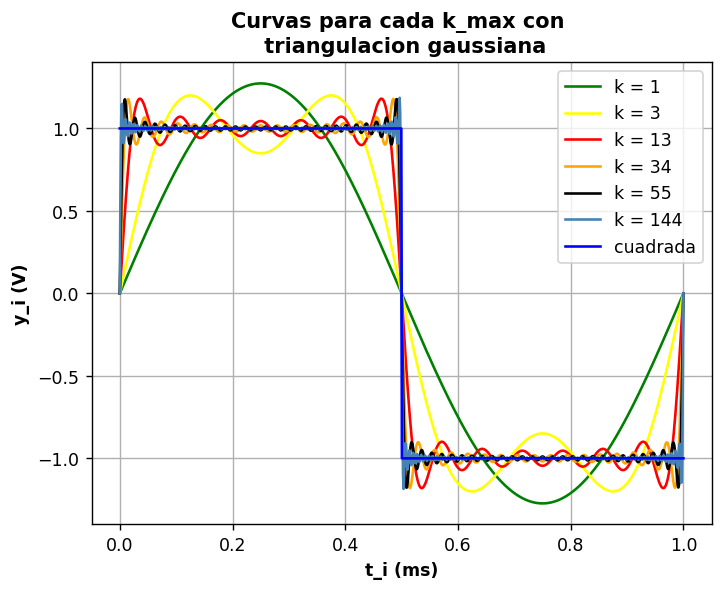

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

plt.figure(dpi=125)
plt.plot(t_1000, graficar(1, t_1000, y_1000), label='k = 1', color='green')
plt.plot(t_1000, graficar(3, t_1000, y_1000), label='k = 3', color='yellow')
plt.plot(t_1000, graficar(13, t_1000, y_1000), label='k = 13', color='red')
plt.plot(t_1000, graficar(34, t_1000, y_1000), label='k = 34', color='orange')
plt.plot(t_1000, graficar(55, t_1000, y_1000), label='k = 55', color='black')
plt.plot(t_1000, graficar(144, t_1000, y_1000), label='k = 144', color='steelblue')
plt.plot(t_1000, y_1000, label='cuadrada', color='blue')

plt.xlabel('t_i (ms)', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.title('Curvas para cada k_max con \n triangulacion gaussiana', weight='bold')
plt.ylabel('y_i (V)', weight='bold')
plt.show()

### e) Cuántos valores de k cree que son necesarios para representar en forma exacta a la función cuadrada? Por qué?

En principio, los valores necesarios de $ k $ para representar de forma cercana a la funcion cuadrada seria $ k>=144 $ observandolo a partir del gráfico anterior. Es decir, a mayor valor de $ k $ la descomposicion en serie de Fourier representa mejor a la funcion cuadrada original. Por otro lado, la integral del error cuadratico deberia tender a cero en un periodo con lo cual la representacion de la funcion cuadrada seria exacta en terminos de éste error cuadrático.

Cabe destacar que términos como "exactitud" o "cercano" dependen exclusivamente del caso que estamos resolviendo, ya que quizás con k=144 puede alcanzar perfectamente para un caso, pero ser muy malo para otro que necesite una precisión mayor.

#4) Resolución mediante el método iterativo de Gauss-Seidel

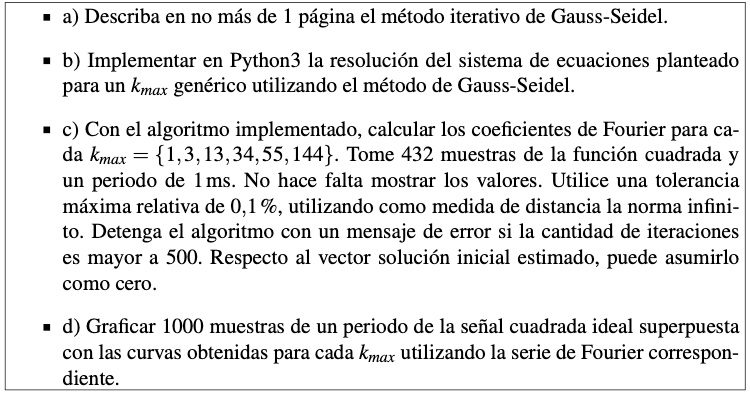

## a) Describa en no más de 1 página el método iterativo de Gauss-Seidel.

El método de Gauss-Seidel es un método iterativo utilizado para resolver sistemas de ecuaciones lineales. 

Aunque este método puede aplicarse a cualquier sistema de ecuaciones lineales que produzca una matriz (cuadrada, naturalmente pues para que exista solución única, el sistema debe tener tantas ecuaciones como incógnitas) de coeficientes con los elementos de su diagonal no-nulos, la convergencia del método solo se garantiza si la matriz es diagonalmente dominante o si es simétrica y, a la vez, definida positiva.

Esto nos permite encontrar la solución de un sistema de “n” ecuaciones con “n”
incógnitas. En cada iteración obtenemos una solución posible del sistema con un error determinado, a medida que aplicamos nuevamente el método, la solución puede ser más precisa, entonces se dice que el sistema converge, pero si al aplicar el método reiteradas veces la solución tiene un error cada vez mayor se dice que el sistema no converge y no se puede resolver el sistema de ecuaciones por este método.

En notación matricial:

$ Ax = b $  donde:



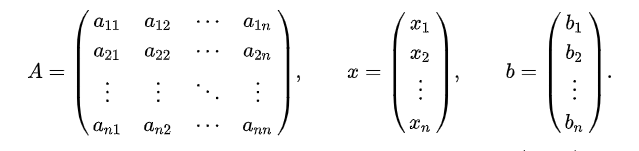

El metodo busca transformar eso en otro equivalente, en donde la sucesion de los vectores que aproxima a la solucion se genera como:


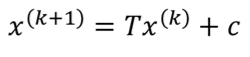

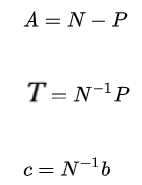

donde los coeficientes de la matriz N se definen como $n_{ij} = a_{ij} $ si $i \le  j$,  $n_{ij} = 0$ si $i > j$


Este metodo es una version acelerada de Jacobi. En el cual es necesario contar con un vector aproximado completo para proceder a la sustitucion en las ecuaciones de recurrencia y obtener una nueva aproximacion.

En el metodo de Gauss-Seidel se propone ir sustituyendo los nuevos valores de la aproximacion siguiente conforme se vayan obteniendo sin esperar a tener un vector completo. De esta forma se acelera la convergencia.

A partir de las ecuaciones de recurrencia del metodo de Jacobi:

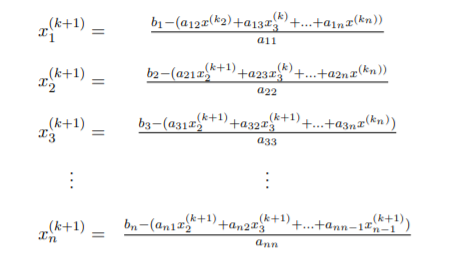

## b) Implementar en Python3 la resolución del sistema de ecuaciones planteado para un kmax genérico utilizando el método de Gauss-Seidel.

In [69]:
import numpy as np
def resolverGaussSeidel(A, B, tolerancia, iteramax):

    X0 = [0.0] * len(B)
    n = len(B)
    X = np.copy(X0)
    dif = [0.0] * len(B)
    max_dif = 2 * tolerancia

    itera = 0
    while not (max_dif <= tolerancia or itera > iteramax):
        for i in range(0, len(B), 1):
            aux = 0
            for j in range(0, len(B), 1):
                if (i != j):
                    aux = aux - A[i][j] * X[j]
            x_1 = (B[i] + aux) / A[i][i]
            dif[i] = np.abs(x_1 - X[i]) / np.abs(x_1)
            X[i] = x_1
        max_dif = np.max(dif)
        itera = itera + 1
        if itera > iteramax+1:
          return "ERROR: NUMERO MAXIMO DE ITERACINES ALCANZADO"

    #analisis de convergencia
    if (itera > iteramax):
        X = 0

    return X

In [70]:
# Prueba
resolverGaussSeidel([[10.0, -1.0, 2.0, 0.0], [-1.0, 11.0, -1.0, 3.0], [2.0, -1.0, 10.0, -1.0], [0.0, 3.0, -1.0,8.0]], np.array([6.0, 25.0, -11.0, 15.0]), 0.001, 10)

array([ 1.00009128,  2.00002134, -1.00003115,  0.9999881 ])

In [71]:
# Verificando solucion
np.linalg.solve([[10.0, -1.0, 2.0, 0.0], [-1.0, 11.0, -1.0, 3.0], [2.0, -1.0, 10.0, -1.0], [0.0, 3.0, -1.0,8.0]], np.array([6.0, 25.0, -11.0, 15.0]))

array([ 1.,  2., -1.,  1.])

## c) Con el algoritmo implementado, calcular los coeficientes de Fourier para cada kmax = {1,3,13,34,55,144}. Tome 432 muestras de la función cuadrada y un periodo de 1ms. No hace falta mostrar los valores. Utilice una tolerancia máxima relativa de 0,1 %, utilizando como medida de distancia la norma infinito. Detenga el algoritmo con un mensaje de error si la cantidad de iteraciones es mayor a 500. Respecto al vector solución inicial estimado, puede asumirlo como cero.

In [72]:
t_i, y_i = generar_muestras()

#### $ k_{max} = 1 $

In [73]:
A = generar_matriz_de_ajuste(1, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)

resolverGaussSeidel(At_por_A, At_por_b, 0.001, 500)

array([4.64036183e-16, 1.27323391e+00])

#### $ k_{max} = 3 $

In [74]:
A = generar_matriz_de_ajuste(3, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)

resolverGaussSeidel(At_por_A,At_por_b, 0.001, 500)

array([ 1.64149862e-16, -1.71710057e-16,  5.94889303e-16,  1.27323391e+00,
       -3.38246273e-05,  4.24396269e-01])

#### $ k_{max} = 13 $

In [75]:
A = generar_matriz_de_ajuste(13, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)

resolverGaussSeidel(At_por_A, At_por_b, 0.001, 500)

array([ 1.86460414e-16, -2.17710557e-16,  5.89309526e-16,  4.11811613e-17,
        3.51894394e-16,  9.41568206e-17,  2.76075634e-16, -7.84114575e-17,
        5.13323490e-16, -1.42754854e-16,  7.66990077e-16,  4.99068113e-17,
       -4.41055163e-18,  1.27323391e+00, -3.38246273e-05,  4.24396269e-01,
       -6.76528491e-05,  2.54619722e-01, -1.01488262e-04,  1.81851900e-01,
       -1.35334464e-04,  1.41420321e-01, -1.69195060e-04,  1.15687032e-01,
       -2.03073659e-04,  9.78682071e-02])

#### $ k_{max} = 34 $

In [76]:
A = generar_matriz_de_ajuste(34, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)

print(resolverGaussSeidel(At_por_A,At_por_b,0.001,500))

[ 2.59297407e-16 -2.02517151e-16  5.91344107e-16  7.79698382e-18
  3.57719527e-16  6.96604171e-17  2.92962580e-16 -8.23847579e-17
  5.17512483e-16 -1.60294085e-16  7.91171853e-16  4.07946669e-17
 -1.05656234e-16 -9.95830963e-17  6.43894342e-16 -3.59602148e-17
  1.08017493e-16 -7.22243060e-17  5.91646371e-16 -6.89346386e-18
  1.64992312e-16 -1.00897712e-16  5.41065801e-16 -9.08408321e-17
  2.46762677e-16 -4.93174053e-17  4.93444856e-16 -8.77816313e-17
  2.07215791e-16  9.43499159e-18  5.60812049e-16 -5.83429764e-17
  2.06885646e-16 -1.22111351e-18  1.27323391e+00 -3.38246273e-05
  4.24396269e-01 -6.76528491e-05  2.54619722e-01 -1.01488262e-04
  1.81851900e-01 -1.35334464e-04  1.41420321e-01 -1.69195060e-04
  1.15687032e-01 -2.03073659e-04  9.78682071e-02 -2.36973879e-04
  8.47980594e-02 -2.70899347e-04  7.48005845e-02 -3.04853701e-04
  6.69054639e-02 -3.38840589e-04  6.05120242e-02 -3.72863676e-04
  5.52285215e-02 -4.06926642e-04  5.07885703e-02 -4.41033182e-04
  4.70047137e-02 -4.75187

#### $ k_{max} = 55 $

In [77]:
A = generar_matriz_de_ajuste(55, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)

resolverGaussSeidel(At_por_A, At_por_b, 0.001, 500)

array([ 2.95293646e-16, -2.45086702e-16,  6.44630597e-16, -4.59906722e-17,
        3.87506151e-16,  5.18809555e-17,  2.92883263e-16, -1.26362256e-16,
        4.76937567e-16, -2.48541690e-16,  7.88388413e-16,  1.00298062e-16,
       -9.46686137e-17, -1.03569697e-16,  6.35581680e-16, -8.11534081e-17,
        8.32627754e-17, -4.50889294e-17,  5.67609208e-16, -2.03968331e-17,
        1.26090477e-16, -1.25857070e-16,  4.84111184e-16, -5.79981261e-17,
        1.73736647e-16, -8.80808741e-17,  4.26833924e-16, -1.16789133e-16,
        2.12983301e-16, -1.19394162e-17,  5.71860217e-16, -2.99544770e-17,
        2.67636756e-16, -2.32789769e-17,  4.09123766e-16, -8.31097542e-17,
        1.75058993e-16, -9.07761470e-17,  4.24507939e-16, -8.62039759e-17,
        6.85997421e-16, -1.15003660e-16,  5.35716450e-16, -1.49812385e-16,
        2.33113934e-16, -7.71806135e-17, -4.55978117e-17, -7.20432994e-17,
        6.57540509e-16, -2.28030567e-17,  5.65389402e-16, -1.75078622e-16,
        3.36850680e-16, -

#### $ k_{max} = 144 $

In [78]:
A = generar_matriz_de_ajuste(144, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
At_por_b = generar_producto_At_con_b(A, y_i)

len(resolverGaussSeidel(At_por_A,At_por_b, 0.001, 500))

288

## d) Graficar 1000 muestras de un periodo de la señal cuadrada ideal superpuesta con las curvas obtenidas para cada kmax utilizando la serie de Fourier correspondiente.

In [79]:
t_1000, y_1000 = generar_muestras(cant_muestras=1000, periodo=1)
def graficarGS(k,t_graf,y_graf):
  A_GS = generar_matriz_de_ajuste(k, t_graf, 1000, 1)
  At_por_A_GS = generar_matriz_de_cuadrados_minimos(A_GS)
  At_por_b_GS = generar_producto_At_con_b(A_GS, y_graf)
  return sumatoria(k, resolverGaussSeidel(At_por_A_GS,At_por_b_GS,0.001,500), t_graf)

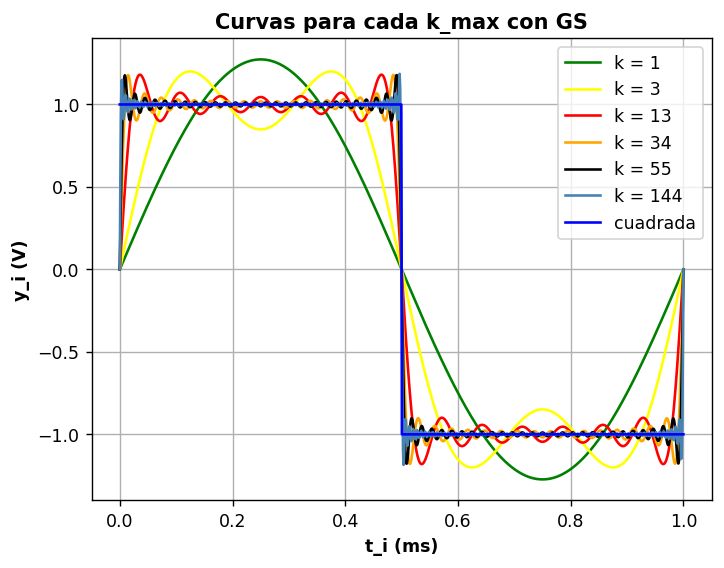

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

plt.figure(dpi=125)
plt.plot(t_1000, graficarGS(1, t_1000, y_1000), label='k = 1', color='green')
plt.plot(t_1000, graficarGS(3, t_1000, y_1000), label='k = 3', color='yellow')
plt.plot(t_1000, graficarGS(13, t_1000, y_1000), label='k = 13', color='red')
plt.plot(t_1000, graficarGS(34, t_1000, y_1000), label='k = 34', color='orange')
plt.plot(t_1000, graficarGS(55, t_1000, y_1000), label='k = 55', color='black')
plt.plot(t_1000, graficarGS(144, t_1000, y_1000), label='k = 144', color='steelblue')
plt.plot(t_1000, y_1000, label='cuadrada', color='blue')

plt.xlabel('t_i (ms)', weight='bold')
plt.grid()
plt.legend(loc='best')
plt.title('Curvas para cada k_max con GS', weight='bold')
plt.ylabel('y_i (V)', weight='bold')
plt.show()

#5) Comparación entre métodos de solución utilizados

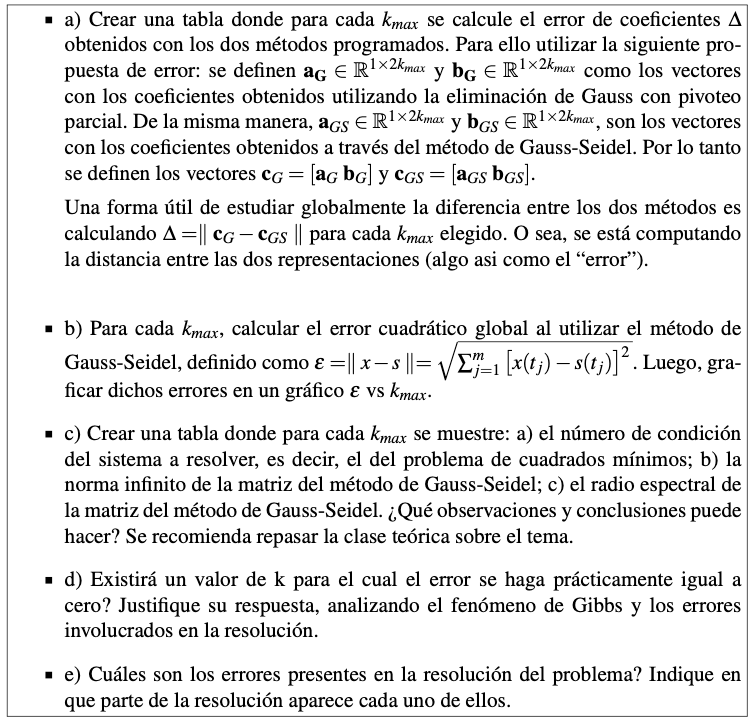

### a) Comparar Errores

In [81]:
def compararErrores():
  ks = [1,3,13,34,55,144]
  t_i, y_i = generar_muestras()

  df = pd.DataFrame(columns=['k', 'error'])
  
  for i in ks:
    # Gauss
    A_G = generar_matriz_de_ajuste(i, t_i, 432, 1)
    At_por_A_G = generar_matriz_de_cuadrados_minimos(A_G)
    At_por_b_G = generar_producto_At_con_b(A_G, y_i)
    At_por_A_final_G, At_por_b_final_G = eliminacion_gaussiana_pivot_parcial(At_por_A_G, At_por_b_G)
    AB_G = sustitucion_inversa(At_por_A_final_G, At_por_b_final_G)


    # Gauss-Seidel
    A_GS = generar_matriz_de_ajuste(i, t_i, 432, 1)
    At_por_A_GS = generar_matriz_de_cuadrados_minimos(A_GS)
    At_por_b_GS = generar_producto_At_con_b(A_GS, y_i)
    AB_GS = resolverGaussSeidel(At_por_A_GS,At_por_b_GS, 0.001, 500)

    # error
    aux = (AB_GS - AB_G) ** 2
    sum = 0
    for j in aux:
        sum = sum + j
    sum = np.sqrt(sum)
    df = df.append({'k': i, 'error': sum}, ignore_index=True)
    sum = 0

  return df
    
compararErrores()

,k,error
0,1.0,0.000000000000000e+00
1,3.0,3.901904364304575e-25
2,13.0,6.509260734949306e-17
3,34.0,5.146085870602727e-17
4,55.0,4.249645535255771e-17
5,144.0,7.244615674817372e-17


### b) Calcular el error cuadrático global al utilizar el método de Gauss-Seidel

In [82]:
def compararErrorCuadratico():
  ks = [1,3,13,34,55,144]
  t_i, y_i = generar_muestras()

  df = pd.DataFrame(columns=['k', 'error'])  

  for i in ks:
   # GS
    A_GS = generar_matriz_de_ajuste(i, t_i, 432, 1)
    At_por_A_GS = generar_matriz_de_cuadrados_minimos(A_GS)
    At_por_b_GS = generar_producto_At_con_b(A_GS, y_i)
    AB_GS = resolverGaussSeidel(At_por_A_GS,At_por_b_GS, 0.001, 500)

    # serie de Fourier
    AB_F = sumatoria(i, AB_GS, t_i)

    # error
    aux = (y_i - AB_F) ** 2
    sum = 0
    for j in aux:
        sum = sum + j
    sum = np.sqrt(sum)
    df = df.append({'k': i, 'error': sum}, ignore_index=True)
    sum = 0

  return df

Tdf = compararErrorCuadratico()
Tdf

,k,error
0,1.0,9.091075424719017
1,3.0,6.620685344502001
2,13.0,3.671177007198105
3,34.0,2.487613587488258
4,55.0,2.050286980552897
5,144.0,1.548676258616330


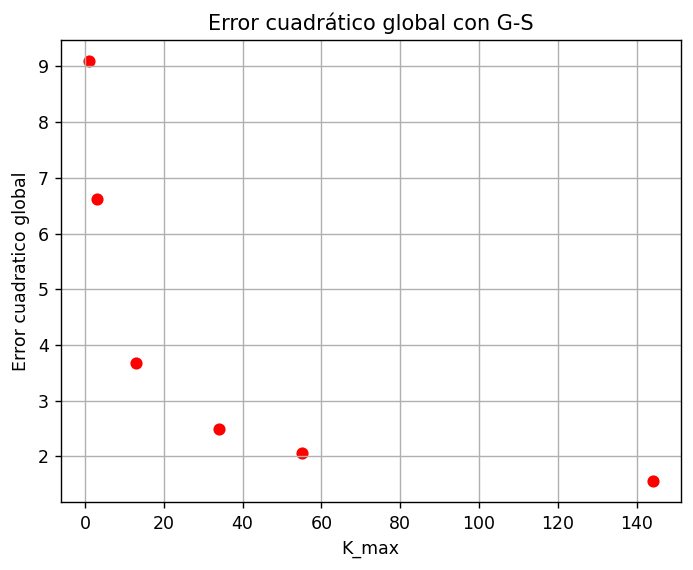

In [83]:
import matplotlib.pyplot as plt

plt.figure(dpi=125)
plt.scatter(Tdf['k'], Tdf['error'], color='red')
plt.xlabel("K_max")
plt.ylabel("Error cuadratico global")
plt.grid()
plt.title("Error cuadrático global con G-S")
plt.show()

### c) Crear una tabla donde para cada $ k_{max} $ se muestre: a) el número de condición del sistema a resolver, es decir, el del problema de cuadrados mínimos; b) la norma infinito de la matriz del método de Gauss-Seidel; c) el radio espectral de la matriz del método de Gauss-Seidel. ¿Qué observaciones y conclusiones puede hacer? Se recomienda repasar la clase teórica sobre el tema

In [84]:
import numpy as np

def generar_matriz_de_gauss_seidel(A):
  '''
  Devuelve la matriz (D - L)^-1 * U dada una matriz A
  Esta funcion solamente la utilizamos para hallar la matriz de GS y 
  hallar las condiciones del punto 5.
  A: la matriz debe ser cuadrada.
  '''
  dimension = len(A)
  # Creo matrices cuadradas de dim x dim, todas llenas con 0 en un inicio.
  D = np.zeros(shape=(dimension, dimension))
  L = np.zeros(shape=(dimension, dimension))
  U = np.zeros(shape=(dimension, dimension))
  # Completo la diagonal de D
  for i in range(0, dimension):
    D[i, i] = A[i, i]
  # Completo la matriz L, triangular inferior
  for i in range(1, dimension):
    for j in range(i):
      L[i, j] = - A[i, j]
  # Completo la matriz U, triangular superior
  for i in range(0, dimension):
    for j in range(i + 1, dimension):
      U[i, j] = - A[i, j]
  # Hago operaciones para hallar (D - L)^-1 * U
  D_menos_L = D - L
  D_menos_L_inv = np.linalg.inv(D_menos_L) # Obtengo (D - L)^-1
  resultado = np.dot(D_menos_L_inv, U)
  return resultado

In [85]:
# Prueba 1 y ejemplo de uso
A = generar_matriz_de_ajuste(3, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
generar_matriz_de_gauss_seidel(At_por_A)

array([[ 0.00000000e+00, -4.61893764e-03, -4.61893764e-03,
        -9.30460802e-18, -6.56390518e-17, -1.08610516e-17],
       [ 0.00000000e+00,  2.13345850e-05, -4.59760306e-03,
        -6.55960744e-17,  3.19809160e-17,  1.96967322e-16],
       [ 0.00000000e+00,  2.12360418e-05,  4.25706268e-05,
         1.72806721e-16,  2.29892146e-16, -2.04143137e-17],
       [ 0.00000000e+00,  4.54493339e-20,  3.53735354e-19,
         3.43532939e-32,  4.08378972e-17, -3.52895435e-17],
       [ 0.00000000e+00,  3.10169872e-19,  1.68097510e-19,
         3.84102679e-32,  6.00737343e-32,  1.36610486e-17],
       [ 0.00000000e+00,  5.42027606e-20, -8.59985069e-19,
        -1.62702696e-32,  1.08554800e-33,  4.09177615e-32]])

In [86]:
# Prueba 2 y ejemplo de uso
A = generar_matriz_de_ajuste(144, t_i, 432, 1)
At_por_A = generar_matriz_de_cuadrados_minimos(A)
generar_matriz_de_gauss_seidel(At_por_A)

array([[ 0.00000000e+00, -4.61893764e-03, -4.61893764e-03, ...,
         7.79976545e-16,  1.02304616e-16,  5.45624618e-16],
       [ 0.00000000e+00,  2.13345850e-05, -4.59760306e-03, ...,
         2.20749565e-16,  5.27716706e-16,  2.69522895e-16],
       [ 0.00000000e+00,  2.12360418e-05,  4.25706268e-05, ...,
         1.18149589e-15,  1.01475168e-15,  6.94162615e-16],
       ...,
       [ 0.00000000e+00, -3.86640022e-18, -5.16047460e-18, ...,
         1.47779573e-27,  4.30062210e-15,  1.75015118e-15],
       [ 0.00000000e+00, -8.39188212e-19, -3.66770394e-18, ...,
         1.67273305e-28,  1.34034511e-27,  1.07095872e-14],
       [ 0.00000000e+00, -3.03111063e-18, -4.80087589e-18, ...,
        -4.19953062e-29,  7.00714081e-29,  1.15254807e-27]])

In [87]:
from numpy.linalg import inv
from numpy import linalg as LA
import numpy as np

def punto5c():
  ks = [1,3,13,34,55,144]
  t_i, y_i = generar_muestras()

  df = pd.DataFrame(columns=['k', 'numero_de_condicion', 'norma_inf', 'radio_espectral'])  

  for i in ks:
   # GS
    A_GS = generar_matriz_de_ajuste(i, t_i, 432, 1)
    At_por_A_GS = generar_matriz_de_cuadrados_minimos(A_GS)
    matriz_GS = generar_matriz_de_gauss_seidel(At_por_A_GS)

    # radio espectral: es el autovalor con maximo valor absoluto -> P(A) = max(abs(autovalores))
    autovalores = LA.eig(matriz_GS)[0]
    espectral = np.abs(autovalores).max()

    # numero de condicion: dada una matriz A, su num_de_condicion es K(A) = ||A|| * ||A^-1||
    AB_GSinv = inv(At_por_A_GS)
    num_condicion = np.linalg.norm(At_por_A_GS, np.inf) * np.linalg.norm(AB_GSinv, np.inf)
    #Kab2 = np.linalg.norm( At_por_A_GS * AB_GSinv )

    # norma infinito
    normaInf = LA.norm(matriz_GS, np.inf)

    df = df.append({'k': i, 'numero_de_condicion': num_condicion, 'radio_espectral': espectral, 'norma_inf': normaInf }, ignore_index=True)

  return df

Tdf = punto5c()
Tdf

,k,numero_de_condicion,norma_inf,radio_espectral
0,1.0,1.004640371229699,9.304608020683910e-18,8.697747394719987e-35
1,3.0,1.018561484918794,9.237875288683429e-03,3.139157810764656e-04
2,13.0,1.111368909512770,5.542725173210046e-02,8.017813796000132e-03
3,34.0,1.306264501160131,1.524249422632770e-01,2.809249335422071e-02
4,55.0,1.501160092807525,2.494226327944579e-01,4.963845763768297e-02
5,144.0,2.327146171694398,6.605080831409280e-01,1.430868205013873e-01


Conclusiones:

Se puede observar que para todos los $ k_{max} $ 1 y 3, los numeros de condicion son muy cercanos a 1 lo que quiere decir que la matriz de cuadrados minimos, para estos casos, esta bien condicionada. Al mismo tiempo, notamos que al ir aumentado los valores de $ k_{max} $ pierde esa propiedad de estar bien condicionada y si bien el valor para $ k_{max} = 144 $ no es significativamente mayor que 1, es algo que debemos tener en cuenta indicandonos que pequeñas variaciones en los datos pueden producir grandes variaciones en los resultados y por tanto que la solución del sistema es propensa a grandes errores de redondeo. Otra cosa a destacar es que, en estas condiciones, la norma infinito y el radio espectral cumplen con la propiedad de $ P(A) \le ||A|| $ pero esta brecha se va haciendo menor a medida que aumentamos el valor de $ k_{max} $ 

### d)  Existirá un valor de k para el cual el error se haga prácticamente igual a cero? Justifique su respuesta, analizando el fenómeno de Gibbs y los errores involucrados en la resolución

No, a medida que se adhieren más términos a las series, ésta se va aproximando a la onda cuadrada dado que las oscilaciones se vuelven más rápidas y más pequeñas, pero los picos no disminuyen. Estos picos en las series de Fourier de la función cuadrada nunca desaparecen. Ocurren cada vez que las señales tienen discontinuidades de salto (generalmente en los extremos), y siempre estarán presentes cuando la señal tiene oscilaciones fuertes como en este caso de uno a menos uno.

Para un K=100, este es el efecto Gibbs

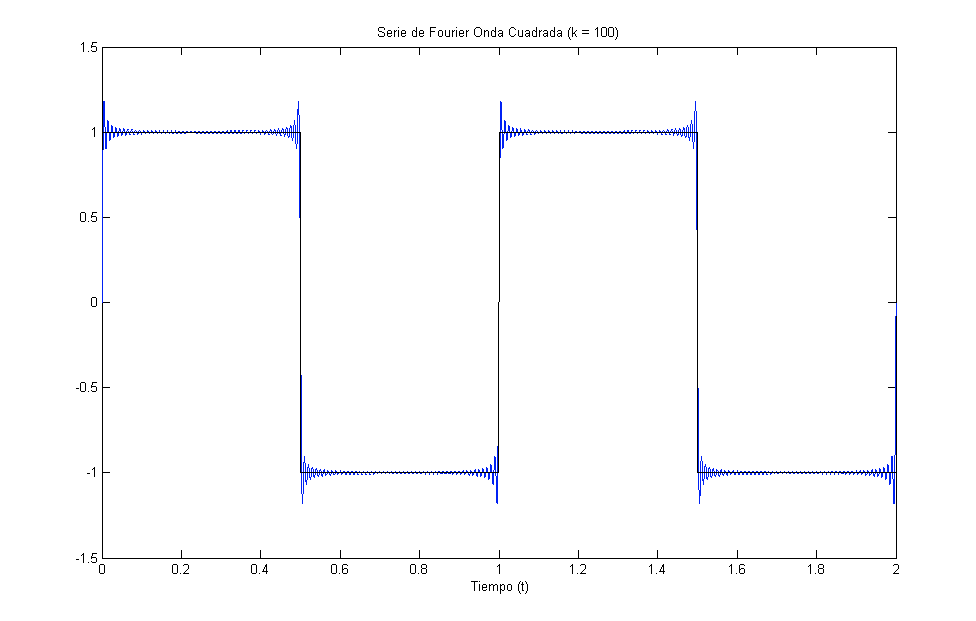

### e) Cuáles son los errores presentes en la resolución del problema? Indique en que parte de la resolución aparece cada uno de ellos

Los errores se presentan principalmente en el truncamiento de $ k_{max} $ ya que se nos presentan una mayor cantidad de términos al momento de armar la matriz de cuadrados minimos que contiene los senos y cosenos. Otra situación se da con la representación de puntos flotantes por parte de la arquitectura.